In [1]:
# Netflix/OTT User Viewing Trends Analysis Project

# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)


In [4]:
# Option 1: Use raw string
df = pd.read_csv(r"D:\Backup\Downloads\archive (5)\All_ViewingActivity.csv")

In [5]:
# 📌 Step 3: Data Inspection
print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)


(9992, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             9992 non-null   object
 1   Start Time               9992 non-null   object
 2   Duration                 9992 non-null   object
 3   Attributes               1399 non-null   object
 4   Title                    9992 non-null   object
 5   Supplemental Video Type  1845 non-null   object
 6   Device Type              9992 non-null   object
 7   Bookmark                 9992 non-null   object
 8   Latest Bookmark          9992 non-null   object
 9   Country                  9992 non-null   object
dtypes: object(10)
memory usage: 780.8+ KB
None
       Profile Name           Start Time  Duration  \
count          9992                 9992      9992   
unique            9                 9988      2741   
top          User 4  2022-03-16 10:3

In [6]:
# 📌 Step 4: Data Cleaning & Preparation

# Check for nulls
print(df.isnull().sum())

# Convert date column to datetime (if available)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Rename columns if needed
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
df.head()


Profile Name                  0
Start Time                    0
Duration                      0
Attributes                 8593
Title                         0
Supplemental Video Type    8147
Device Type                   0
Bookmark                      0
Latest Bookmark               0
Country                       0
dtype: int64


,Profile_Name,Start_Time,Duration,Attributes,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India)


In [7]:
# 📌 Step 5: Feature Engineering

# Extract useful time features
if 'Date' in df.columns:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day_name()
    df['Hour'] = df['Date'].dt.hour if df['Date'].dt.hour.nunique() > 1 else np.nan


C:\Users\admin\AppData\Local\Temp\ipykernel_12448\77623805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_shows.values, y=top_shows.index, palette='magma')


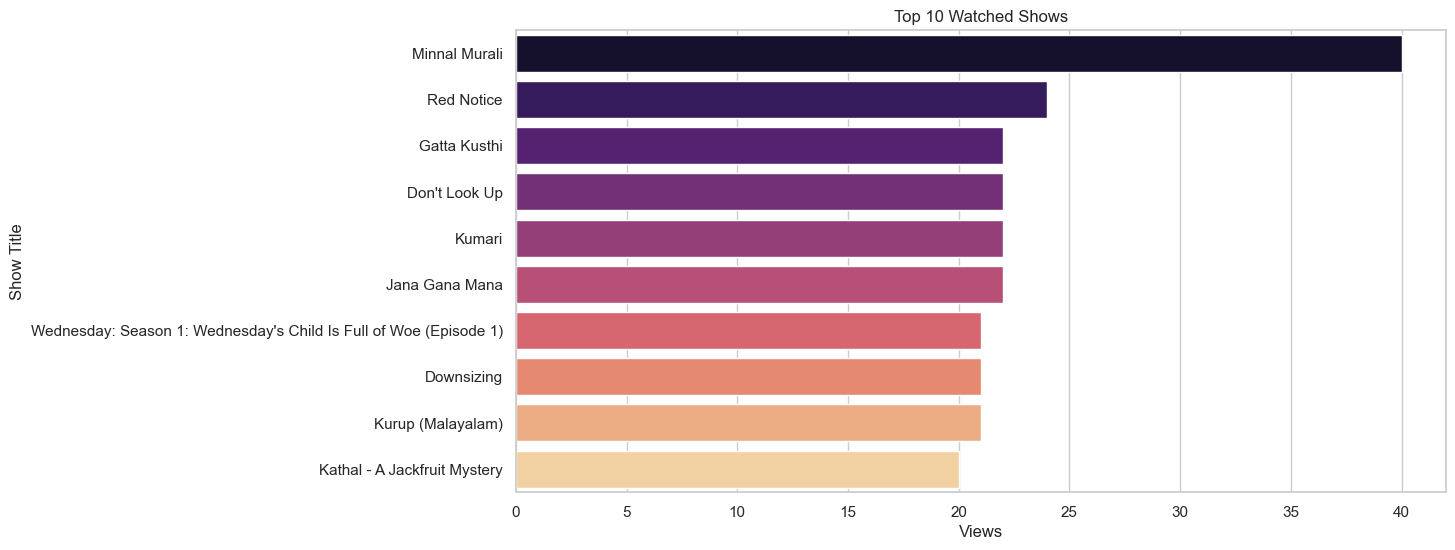

In [8]:
# 📌 Step 6: Univariate Analysis

# Most watched shows
if 'Title' in df.columns:
    top_shows = df['Title'].value_counts().head(10)
    sns.barplot(x=top_shows.values, y=top_shows.index, palette='magma')
    plt.title("Top 10 Watched Shows")
    plt.xlabel("Views")
    plt.ylabel("Show Title")
    plt.show()


In [9]:
# 📌 Step 7: Time-based Viewing Patterns

if 'Date' in df.columns:
    df['Month_Name'] = df['Date'].dt.strftime('%B')
    sns.countplot(data=df, x='Month_Name', order=pd.date_range("2023-01-01", periods=12, freq='M').strftime('%B'), palette='cool')
    plt.title("Viewing by Month")
    plt.xticks(rotation=45)
    plt.show()

    sns.countplot(data=df, x='Day', palette='viridis')
    plt.title("Viewing by Day of Week")
    plt.xticks(rotation=45)
    plt.show()


In [12]:
print(df.columns.tolist())


['Profile_Name', 'Start_Time', 'Duration', 'Attributes', 'Title', 'Supplemental_Video_Type', 'Device_Type', 'Bookmark', 'Latest_Bookmark', 'Country']


In [18]:
['Profile_Name', 'Start_Time', 'Duration', 'Attributes', 'Title', 'Supplemental_Video_Type', 'Device_Type', 'Bookmark', 'Latest_Bookmark', 'Country']


['Profile_Name',
 'Start_Time',
 'Duration',
 'Attributes',
 'Title',
 'Supplemental_Video_Type',
 'Device_Type',
 'Bookmark',
 'Latest_Bookmark',
 'Country']

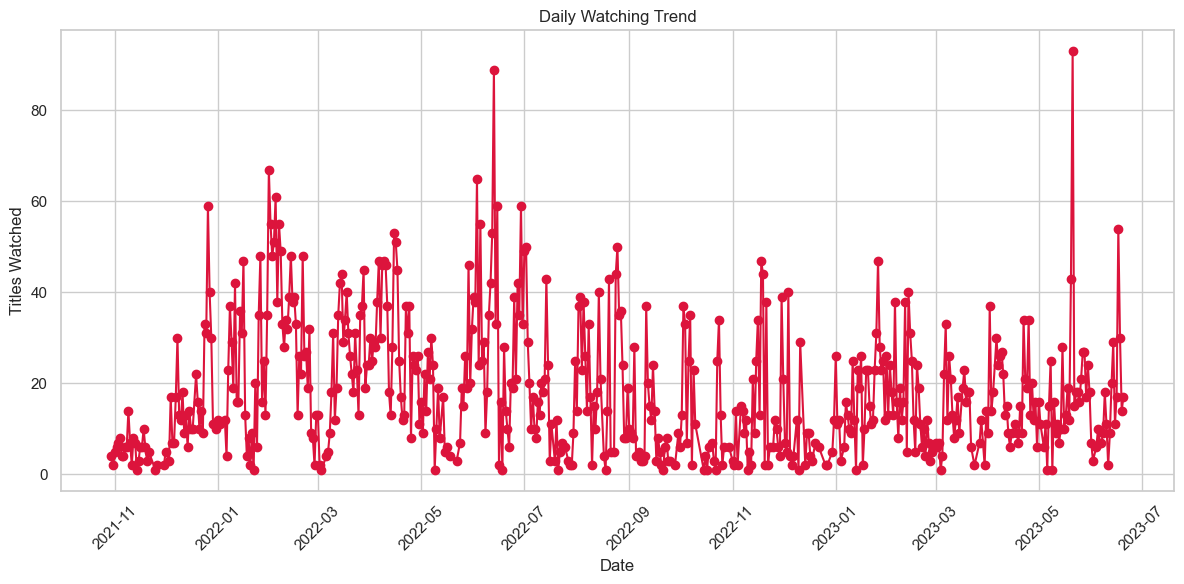

In [19]:
# Convert 'Start_Time' to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract just the date (without time)
df['Date'] = df['Start_Time'].dt.date

# Group by date to find number of titles watched per day
daily = df.groupby('Date').size()

# Plotting the trend
import matplotlib.pyplot as plt

daily.plot(kind='line', marker='o', color='crimson')
plt.title("Daily Watching Trend")
plt.xlabel("Date")
plt.ylabel("Titles Watched")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# 📌 Step 9: Session-based insights (if multiple users)

# Optional: Add user profiles if available
if 'Profile Name' in df.columns:
    profile_views = df['Profile Name'].value_counts()
    sns.barplot(x=profile_views.index, y=profile_views.values, palette='pastel')
    plt.title("Views per User Profile")
    plt.ylabel("Number of Views")
    plt.xlabel("Profile Name")
    plt.xticks(rotation=45)
    plt.show()


In [21]:
# 📌 Step 10: Summary of Insights

print("✅ Summary of Netflix Viewing Trends:")
print("- Most watched show:", df['Title'].value_counts().idxmax() if 'Title' in df.columns else "Not Available")
print("- Busiest viewing day:", df['Day'].value_counts().idxmax() if 'Day' in df.columns else "Not Available")
print("- Most active month:", df['Month'].value_counts().idxmax() if 'Month' in df.columns else "Not Available")
if 'Profile Name' in df.columns:
    print("- Most active profile:", df['Profile Name'].value_counts().idxmax())


✅ Summary of Netflix Viewing Trends:
- Most watched show: Minnal Murali
- Busiest viewing day: Not Available
- Most active month: Not Available
